# Simple Linear Regression

__Aim__:

Predicting the percentage of marks that a student scores based upon the number of hours they have studied.

In [ ]:
1. Loading the data
2. data.describe()
3. visualization among feature and the value to be predicted
   a. Remove Multicolinearity
   b. Feature selection 
   c. Handling Categorical values 
   d. Standardization/ Min-Max Scaling
4. separating the entire dataset into X(x1,x2,x3) and Y
5. Further Split X and Y to X_train, X_test, Y_train and Y_test  (Always pass random_seed and 80:20 or 75:25)
6. Use the ML Algorithm that fits the use case
7. Assess the performance of the model by different metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("datasets_n_images/datasets_module_4/student_scores.csv")
dataset.shape

(25, 2)

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

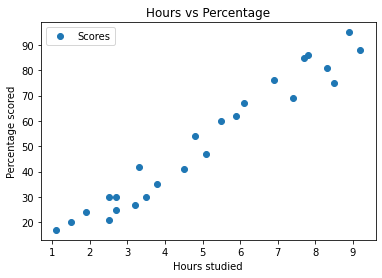

In [6]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show();

In [ ]:
X = dataset['Hours']
y = dataset['Scores']

In [11]:
l = [1,2,3,4,5,6]

In [12]:
l[0:-1]

[1, 2, 3, 4, 5]

In [13]:
# prepare my data
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [14]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


<AxesSubplot:xlabel='Hours'>

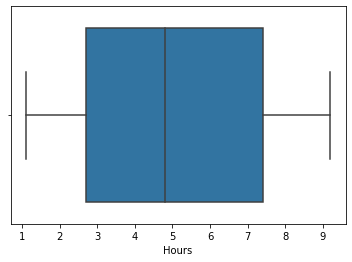

In [48]:
sns.boxplot(x=X['Hours'])

In [66]:
X.shape

(25, 1)

In [67]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [68]:
y.shape

(25,)

In [80]:
np.random.rand(3,2)

array([[0.59737165, 0.90283176],
       [0.53455795, 0.59020136],
       [0.03928177, 0.35718176]])

In [81]:
np.random.seed(10)
np.random.rand(3,2)

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665]])

In [41]:
np.random.seed(990)
np.random.rand(3,2)

array([[0.9806089 , 0.26989058],
       [0.09874419, 0.42379487],
       [0.11342195, 0.61825621]])

In [77]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [78]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

In [82]:
X_train.head()

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [83]:
y_train.head()

22    35
17    24
24    86
23    76
14    17
Name: Scores, dtype: int64

In [84]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [85]:
y_test.head()

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [86]:
X_train.shape

(20, 1)

In [87]:
X_test.shape

(5, 1)

In [88]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [89]:
print("Intercept:",regressor.intercept_)

Intercept: 2.0181600414346974


In [90]:
print("Slope:",regressor.coef_)

Slope: [9.91065648]


In [93]:
9.91065648* 5.5 + 2.0181600414346974

56.5267706814347

In [94]:
2.0181600414346974 + 9.91065648* 6.9

70.4016897534347

In [95]:
X_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [96]:
# Predictions

y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [97]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [98]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
 mean (summation( abs(y_test-y_pred)))

In [100]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


In [101]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.9454906892105355


In [89]:
type(float((metrics.r2_score(y_test, y_pred))))

float

In [90]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: 0.9156881391153407


# Multiple Linear Regression

Predict the gas consumption (in million of gallons) in 48 US states based upon the gas taxes, per capita income, paved highways (in miles), and the proportion of population that has driving license.

In [102]:
dataset = pd.read_csv("datasets_n_images/datasets_module_4/petrol_consumption.csv")

In [103]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [104]:
dataset.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot:>

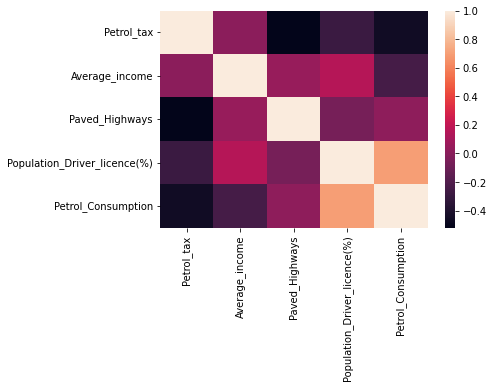

In [105]:
sns.heatmap(dataset.corr())

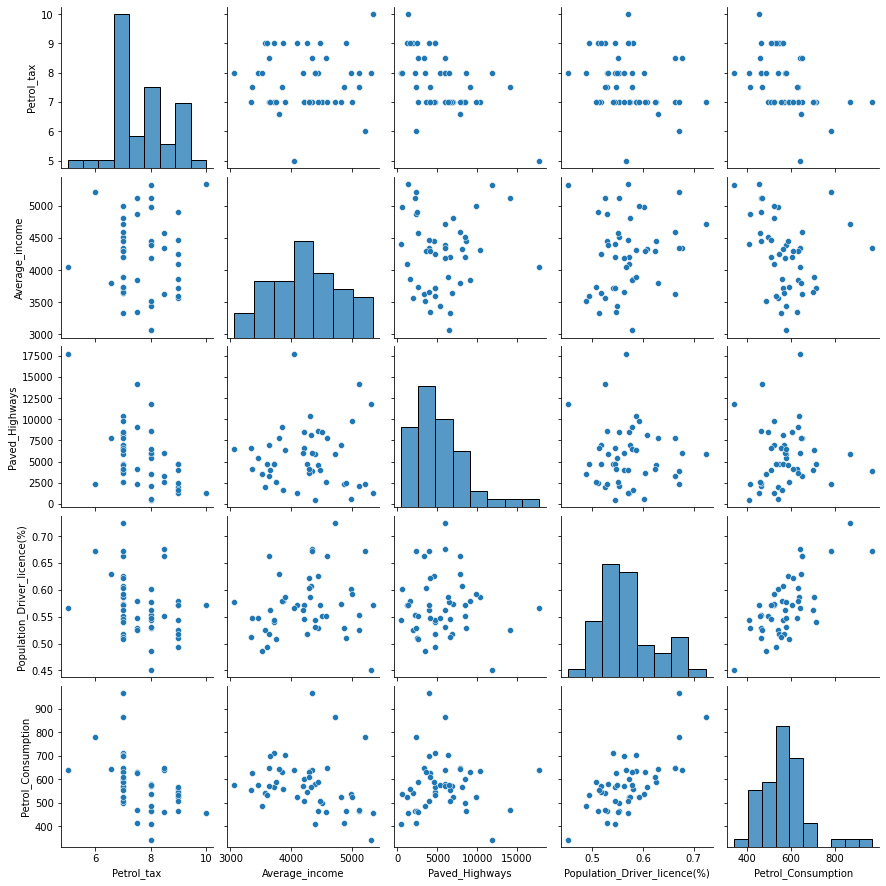

In [106]:
sns.pairplot(dataset)

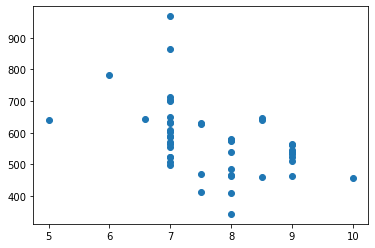

In [93]:
plt.scatter('Petrol_tax','Petrol_Consumption', data=dataset);

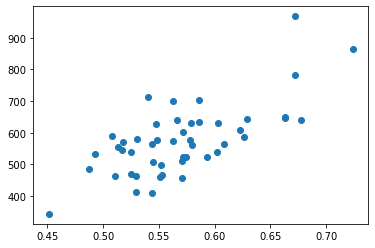

In [94]:
plt.scatter('Population_Driver_licence(%)','Petrol_Consumption', data=dataset);

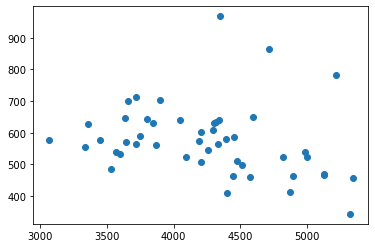

In [95]:
plt.scatter('Average_income','Petrol_Consumption', data=dataset);

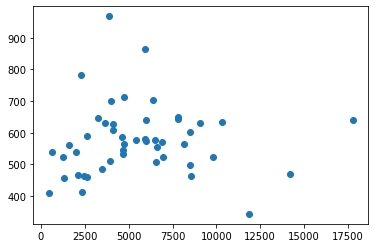

In [96]:
plt.scatter('Paved_Highways','Petrol_Consumption', data=dataset);

In [97]:
dataset.shape

(48, 5)

In [51]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [107]:
X = dataset.drop(['Petrol_tax','Petrol_Consumption','Average_income','Paved_Highways'], axis=1)
# X = dataset.drop(['Petrol_Consumption','Average_income','Paved_Highways'], axis=1)
X.head()

,Population_Driver_licence(%)
0,0.525
1,0.572
2,0.580
3,0.529
4,0.544


In [108]:
y = dataset['Petrol_Consumption']
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [109]:
X.shape

(48, 1)

In [110]:
y.shape

(48,)

In [119]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
X_train.shape

(38, 1)

In [121]:
X_test.shape

(10, 1)

In [122]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [123]:
regressor.coef_

array([1508.07066816])

In [124]:
regressor.intercept_

-285.66717240517744

In [125]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# pd.DataFrame(data, rowname, colname)
coeff_df

,Coefficient
Population_Driver_licence(%),1508.070668


In [126]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
29,534,457.811667
4,410,534.723271
26,577,540.755554
30,571,495.513434
32,577,585.997674
37,704,598.062239
34,487,448.763243
40,587,658.385066
7,467,548.295907
10,580,513.610282


In [127]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 68.4885499524333
Mean Squared Error: 5725.070173663769
Root Mean Squared Error: 75.66419347130959


In [128]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.022932195966889557


In [113]:
# r2 = (metrics.r2_score(y_test, y_pred))
# n = 5
# k = 1
# adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
# print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: -0.30275707204414726


# Retrain

In [129]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [130]:
X_train.shape

(33, 1)

In [131]:
X_test.shape

(15, 1)

In [132]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [133]:
regressor.coef_

array([1566.75730759])

In [134]:
regressor.intercept_

-322.1152419439519

In [135]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# pd.DataFrame(data, rowname, colname)
coeff_df

,Coefficient
Population_Driver_licence(%),1566.757308


In [136]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
29,534,450.296111
4,410,530.200733
26,577,536.467763
30,571,489.465043
32,577,583.470482
37,704,596.004540
34,487,440.895567
40,587,658.674833
7,467,544.301549
10,580,508.266131


In [137]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 68.73914178304157
Mean Squared Error: 5573.483710556493
Root Mean Squared Error: 74.65576809970207


In [138]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: -0.07188242337633088


In [ ]:
# r2 = (metrics.r2_score(y_test, y_pred))
# n = 5
# k = 1
# adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
# print("Adjusted R2 Error:", adj_r2)

# Factors

>1. Need more data: What we have is just one year data, whereas multiple years data would have helped in getting a better model.

>2. Bad Assumptions: We made the assumption that the data has linear relationship, which may not be the case. Visualizing that first would have been a better idea.

>3. Poor features The features we used may not have had a high corelation to the values we are trting to predict.

>4. Granularity.